In [230]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from mpl_toolkits.mplot3d import Axes3D # Not needed
from sklearn.metrics import mean_squared_error, completeness_score
from sklearn.cluster import KMeans

%matplotlib inline 

In [231]:
df = pd.read_csv('.././creditcard.csv', sep=',')
print(len(df.index))

df.head()

284807


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [232]:
# According to the covariance matrix these columns have the most influence
df_sub = df[['V1', 'V2', 'V3', 'Class']]
df_sub.head()

,V1,V2,V3,Class
0,-1.359807,-0.072781,2.536347,0
1,1.191857,0.266151,0.166480,0
2,-1.358354,-1.340163,1.773209,0
3,-0.966272,-0.185226,1.792993,0
4,-1.158233,0.877737,1.548718,0


In [233]:
X = df_sub[['V1', 'V2', 'V3']]
y = df_sub[['Class']]

clf = KMeans(n_clusters = 2)
clf.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [234]:
y_hat = clf.predict(X)

# Some evaluation metric for clustering returns 1 if y_hat is
# equal to y.
print("completeness score", completeness_score(y.values.ravel(), y_hat))
print("mean squared error", mean_squared_error(y.values.ravel(), y_hat))

completeness score 0.0002467891164161898
mean squared error 0.5024209376876271


In [235]:
# Change distribution
y_int = df_sub["Class"].apply(lambda x: int(x))
y_1 = df_sub.loc[ df_sub["Class"] == 1 ] 
y_0 = df_sub.loc[ df_sub["Class"] == 0 ]

y_0 = y_0[:10000]
df_s = pd.concat([y_1, y_0])

X = df_s[['V1', 'V2', 'V3']]
y = df_s[['Class']].values.ravel()

/Users/robvangastel/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


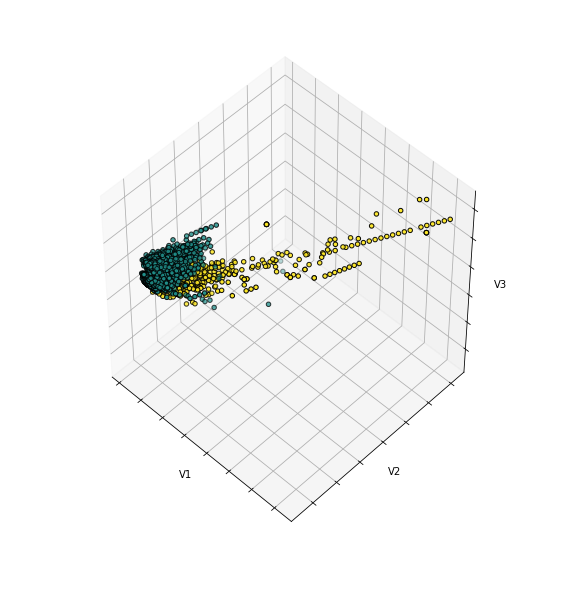

In [236]:
fig = plt.figure(1, figsize=(8, 8))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

normalize = matplotlib.colors.Normalize(vmin=-1, vmax=1)
ax.scatter(X['V3'], X['V1'], X['V2'], c=y, norm=normalize, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('V1')
ax.set_ylabel('V2')
ax.set_zlabel('V3')
ax.dist = 12

fig.show()

In [237]:
X = df_s[['V1', 'V2', 'V3']]
y = df_s[['Class']]

clf = KMeans(n_clusters = 2)
clf.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [238]:
y_hat = clf.predict(X)

# Some evaluation metric for clustering returns 1 if y_hat is
# equal to y.
print("completeness score", completeness_score(y.values.ravel(), y_hat))
print("mean squared error", mean_squared_error(y.values.ravel(), y_hat))

completeness score 0.5661509491261598
mean squared error 0.036885245901639344


/Users/robvangastel/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


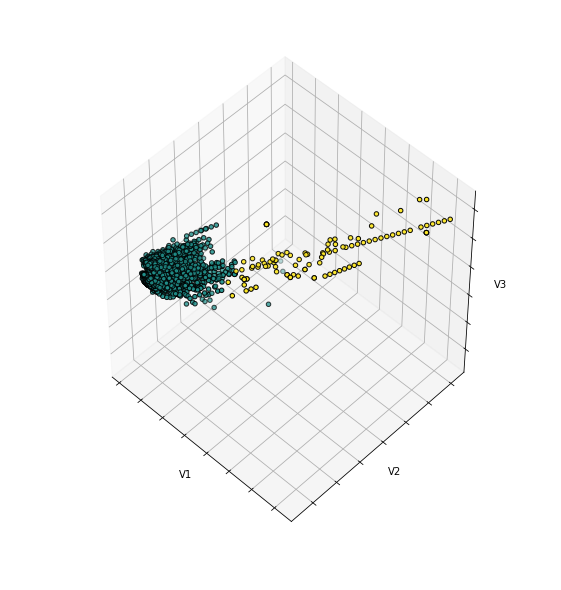

In [239]:
# Plot with prediction values
fig = plt.figure(1, figsize=(8, 8))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

normalize = matplotlib.colors.Normalize(vmin=-1, vmax=1)
ax.scatter(X['V3'], X['V1'], X['V2'], c=y_hat, norm=normalize, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('V1')
ax.set_ylabel('V2')
ax.set_zlabel('V3')
ax.dist = 12

fig.show()

TypeError: text() missing 3 required positional arguments: 'y', 'z', and 's'

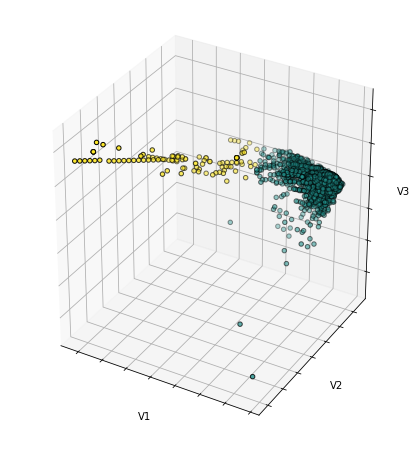

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [274]:
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(1, 2, 2, projection='3d')

f1 = plt.figure()
f2 = plt.figure()

normalize = matplotlib.colors.Normalize(vmin=-1, vmax=1)
ax.scatter(X['V3'], X['V1'], X['V2'], c=y_hat, norm=normalize, edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('V1')
ax.set_ylabel('V2')
ax.set_zlabel('V3')
ax.text('prediction data', fontsize=16)

ax = fig.add_subplot(1, 2, 1, projection='3d')

ax.scatter(X['V3'], X['V1'], X['V2'], c=y.values.ravel(), norm=normalize, edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('V1')
ax.set_ylabel('V2')
ax.set_zlabel('V3')
ax.

# plt.show()